| **Kinga Węzka** <BR> kinga.wezka@pw.edu.pl  <BR> Warsaw University of Technology <BR> Faculty Geodesy and Cartography <BR> Plac Politechniki 1 (room 38)<BR> 00-661 Warszawa, POLAND<BR> <A href="https://www.google.com/maps/place/Gmach+G%C5%82%C3%B3wny+Politechniki+Warszawskiej/@52.220656,21.0094422,19z/data=!3m1!4b1!4m5!3m4!1s0x471ecce951c85a19:0x712b0e1503c42b91!8m2!3d52.220656!4d21.0099894"> N 52&ordm; 12' 45&quot; / E 21&ordm; 03' 51&quot;</A></B><BR> | <a rel="license" href="https://www.pw.edu.pl"><img alt="Politechnika Warszawska" style="border-width:0" src="https://www.pw.edu.pl/design/pw/images/znak-pw.png" /></a> |
|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
    

# Spis tresci:

1. [Matplotlib  wprowadzenie](#wprowadzenie)
2. [Pojedyńczy wykres](#single_plot)
    2. [Pojedyńczy wykres - opis osi, legenda, kolory wykresów](#single_plot1)
    2. [Pojedyńczy wykres - 2 skale dla osi y (lewa, prawa)](#single_plot1)
3. [Wiele wykresów na jednym obiekcie Figure](#multiple_plots)
4. [Definiowanie stylów wykresu](#style)
    4. [Dostępne style](#style1)
    4. [Plik z własnym stylem](#style2)
    4. [Definicja stylu za pomocą rcParams](#style3)
5. [Histogram](#histogram)
6. [Scatter ](#scatter)
7. [Wykres pudełkowy - boxplot](#boxploy)
8. [Zapisywanie wykresów interaktywnych](#interaktywne)
9. [Mapa - shapefile](#shapefile)

# 1. Matplotlib wprowadzenie <a name="wprowadzenie"></a>

+  **Dokumentacja biblioteki**: https://matplotlib.org/

+ Wszystkie przykłady w notatniku napisane sa z użyciem interfejsu obiektowego biblioteki Matplotlib

+  **Plik: matplotlibrc**: https://matplotlib.org/stable/tutorials/introductory/customizing.html
Zapytanie o plik (scieżka dostępu do pliku): 

`import matplotlib
 matplotlib.matplotlib_fname()
'/home/foo/.config/matplotlib/matplotlibrc'
`
+  **Przywrócenie domyslnego stylu matplotlib**   `plt.rcdefaults()`


+  **Opcje wyświetlania wykresów w notebooku jupyter** 
Ustawienia formatu wyświetlania, realizowane są za pomoca jednej z metod magicznych Jupytera:

    +  wyświetlenie w domyślnym oknie interaktywnym

    `%matplotlib`

    + wyświetlenie w wybranym oknie interaktywnym:  qt, wx, gtk, osx, tk, empty uses default

    `%matplotlib qt`  

    + wyswietlenie w lini komórki Jupyter 

    `%matplotlib inline`

    + wyświetlanie w lini z opcjami interaktywnymi:

    `%matplotlib notebook`

# 2. Pojedyńczy wykres <a name="single_plot"></a>

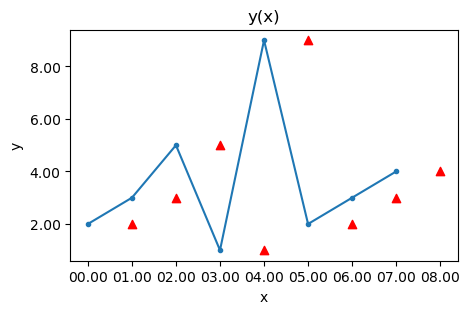

In [2]:
# 0) import potrzebnych bibliotek i klas - Przykład  
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter # format string dla znaczników osi

plt.rcdefaults() 
X = np.array([1, 2, 3, 4, 5, 6, 7, 8])
Y = np.array([2, 3, 5, 1, 9, 2, 3, 4])

# 1) Zdefiniowanie obiektu Figure i Obiektu/ów (Axes)
fig = plt.figure(figsize = (5, 3))
ax  = fig.add_subplot(111)

# 1) wykres
ax.plot(Y, '.-', )
ax.scatter(X, Y, marker = '^', color = 'red')
ax.set_title('y(x)')
ax.set_xlabel('x')
ax.set_ylabel('y')

# ZMIANA FORMATOWANIA OPISÓW OSI;
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))   # po zaimportowaniu:from matplotlib.ticker import FormatStrFormatter
ax.xaxis.set_major_formatter(FormatStrFormatter('%05.2f')) # po zaimportowaniu:from matplotlib.ticker import FormatStrFormatter

# 4) rysuj, przesłanie do backendu, renderowanie
plt.show()

# 5) Zapisz
fig.savefig('nazwa_obrazka2.png',  format='png',  pad_inches=0.1, dpi='figure')

## 2A. Pojedyńczy wykres - opis osi, legenda, kolory wykresów <a name="single_plot1"></a>

[0, 2, 4, 6]


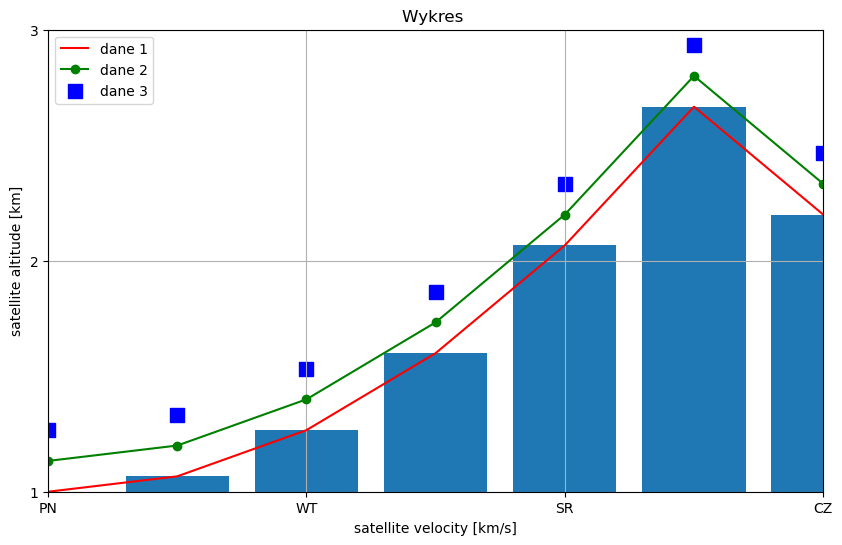

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np


# generowanie danych
x_values = [0, 1, 2, 3, 4, 5, 6] 
squares = [0, 1, 4, 9, 16, 25, 18] 
s1 = [x+2 for x in squares]
s2 = [x+4 for x in squares]

plt.rcdefaults() # przywraca ustawienia domyślne dla rc params

# START
#plt <=>'matplotlib.pyplot': https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html
fig = plt.figure(figsize=(10, 6)) 

# Get the axes instance at 1st location in 1x1 grid
ax = fig.add_subplot(1,1,1) # utorzenie obiektu klasy axes
ax.set_title('Wykres ')

plt.plot(x_values, squares, color = 'red', label= 'dane 1')                        # matplotlib.pyplot.plot
plt.plot(x_values, s1, color = 'green', marker = 'o', label= 'dane 2')             # matplotlib.pyplot.plot
plt.scatter(x_values, s2,  s = 100, color = 'blue', marker = 's', label= 'dane 3') # matplotlib.pyplot.scatter
plt.bar(x_values, squares)

ax.legend() # wstawienie legendy (dane z argumentu 'label')

ax.set_ylabel('satellite altitude [km]')     # opis osi y
ax.set_xlabel('satellite velocity [km/s]')   # opis osi x
ax.grid(True, which='major', axis = 'y') # generowanie gridu na osi y
ax.grid(True, which='major', axis = 'x') # generowanie gridu na osi x

# definiowanie opisów znaczników OSI
ax.set_xlim(0, 6)  # definiowanie zakresu osi x (analogicznie można zrobić dla osi y)
ax.set_xticks(range(0, 6+1, 2)) # lokalizacja opisu
print(list(range(0, 6+1, 2)))
ax.set_xticklabels(['PN',  'WT', 'SR', 'CZ']) # etykiety znaczników osi


ax.set_ylim(0, 30)  # zakres rzeczywistych wartości 
ax.set_yticks([0, 15, 30]) # lokalizacja opisów
ax.set_yticklabels(['1', '2', '3']) #  etykiety znaczników osi

plt.show()
fig.savefig('nazwa_obrazka3.png',  format='png',  pad_inches=0.1, dpi='figure')

#import pickle
#pickle.dump(fig, open('sat_height.pickle', 'wb'))

## 2B. Pojedyńczy wykres - 2 skale osi y (lewa, prawa) <a name="single_plot2"></a>

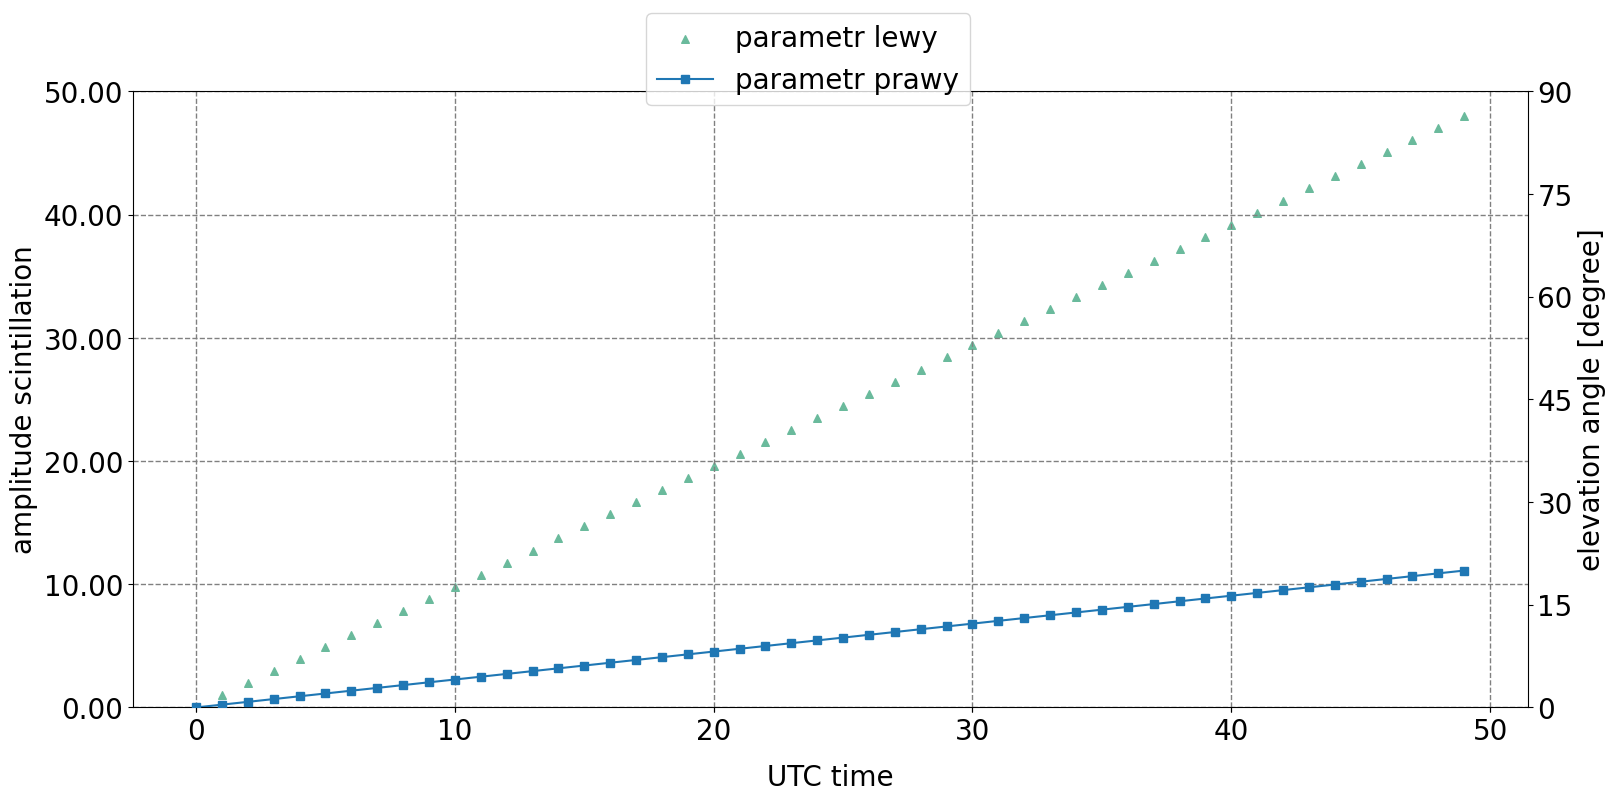

In [71]:
import matplotlib.pyplot as plt 
from matplotlib.pyplot import rc, rcParams 
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, MaxNLocator

# Przygotowanie danych
out_name = 'plot_left_right_y_axis.png'
x = range(50)

y_left  = np.linspace(0, 48, 50 )
y_right = np.linspace(0, 20, 50 )   # x-axis: list of values

# colors
pw_mieta  ='#6ABA9C' #{pw_mieta}{RGB}{106,186,156}
pw_orange ='#EA7C5A'  # {RGB}{234,124,90} % pw_orange
# PLOTING general settings
rc('grid', color='gray', linewidth=1, linestyle='--')
fontsize = 20
rc('xtick', labelsize = fontsize)
rc('ytick', labelsize = fontsize)
rc('font', size = fontsize)

yFormatter = FormatStrFormatter('%04.2f')
    
# DEFINE FIGURE
fig =plt.figure(figsize=(18,8))

# ---SUBPLOT left y-axis
ax1 = fig.add_subplot(111)
ax1.scatter(x, y_left, color = pw_mieta, s =30,  marker = '^', label ='parametr lewy')   # matplotlib.pyplot.plot
# Y-axis 
ax1.set_ylabel('amplitude scintillation')     # opis osi y
ax1.set_ylim(0, 50)
ax1.set_yticks(range(0, 50+1, 10))
ax1.yaxis.grid(True, which='major')
ax1.yaxis.set_major_formatter(yFormatter)
# X-axis 
ax1.xaxis.grid(True, which='major')
ax1.set_xlabel('UTC time') 
ax1.xaxis.labelpad = 40

# --- SUBPLOT right y-axis
ax1a = fig.add_subplot(111,  sharex=ax1, frameon=False)
ax1a.plot(x, y_right, 's-', label = 'parametr prawy')  
# Y-axis 
ax1a.set_ylim(0, 90)
ax1a.set_yticks(range(0, 90+1, 15))
ax1a.yaxis.tick_right()
ax1a.yaxis.set_label_position("right")
ax1a.set_ylabel('elevation angle [degree]')

# hide tiks lavel from one plot, otherwise double description
xticklabels = ax1.get_xticklabels() #+ax1a.get_xticklabels()
plt.setp(xticklabels, visible=False)

# -- Common legend box
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes] # pobranie danych label
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)] # przygotownie list znaczników i etykiet
fig.legend(lines, labels, loc = 'upper center')

# save file
plt.savefig(out_name, format='png',bbox_inches='tight',pad_inches=0.01,dpi=900)
plt.show() # wyświetlenie


# 2. Wiele wykresów na jednym obiekcie Figure <a name="multiple_plots"></a>

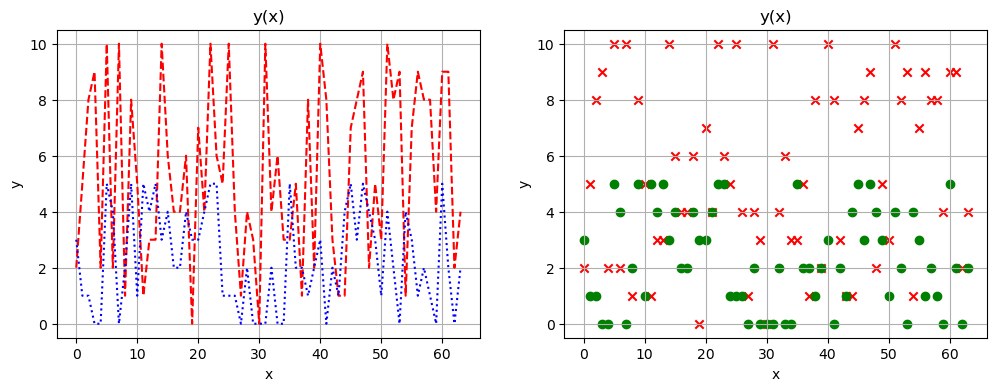

In [2]:
#przygotpwanie danych
import random 

x  = range(64)
y  = [random.randint(0, 10) for i in range(64)]
y1 = [random.randint(0, 5) for i in range(64)]

# 0) import potrzebnych bibliotek i klas - Przykład  
import matplotlib.pyplot as plt

# 1) Zdefiniowanie obiektu Figure i Obiektu/ów (Axes)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

#1a) Alternatywnie: najpierw obiekt Figure a póxniej kolejne:
#fig = plt.figure(figsize=(10, 6))  #arkusz: zdefiniowanie obiektu Figure
#ax1 = fig.add_subplot(2,1,1) # dodawnie kolejnych wykresów - obiekt klasy Axes 
#ax2 = fig.add_subplot(2,1,2) # dodawnie kolejnych wykresów - obiekt klasy Axes 

# 2) wykres 1
ax1.plot(x, y, '--', color = 'red')  # funkcja wykresu
ax1.plot(x, y1, ':', color = 'blue') # funkcja wykresu

ax1.set_title('y(x)')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.grid()

# 2) wykres 2
ax2.scatter(x, y, marker = 'x', color = 'red') # funkcja wykresu
ax2.scatter(x, y1, marker = 'o', color = 'green') # funkcja wykresu

ax2.set_title('y(x)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.yaxis.grid(True, which='major')             # generowanie gridu na osi y
ax2.xaxis.grid(True, which='major')             # generowanie gridu na osi x

# 4) rysuj przesłanie do backendu, renderowanie
plt.show()

# 5) Zapisz
fig.savefig('nazwa_obrazka2.png',  format='png', pad_inches=0.1, dpi = 72)

# Definiowanie stylów wykresu <a name="style"></a>

+ A. Można skorzystać ze stylów dostępnych w bibliotece matplotlib, aby wyświetlić dostępne style należy użyć metody: `plt.style.available`

+ B. Można zdefiniować własny style w pliku i importować go do każdego wykresu,
+ C. Każdemu wykresowi można ustawić indywidualny styl za pomocą parametrów `matplotlib.rcParams`

##  4A. Dostępne style <a name="style1"></a>

In [18]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

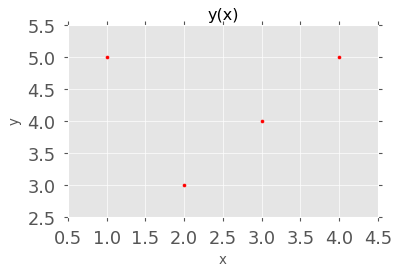

In [52]:
import matplotlib.pyplot as plt

plt.style.available # wyświetli dostępne style
plt.style.use('fast') 

fig = plt.figure(figsize = (5, 3))
ax  = fig.add_subplot(111)

ax.scatter([1, 2, 3, 4], [5, 3, 4, 5],  s=14, c='red')
ax.set_title('y(x)')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

##  4B. Plik z własnym stylem <a name="style2"></a>
Definujemy plik `my_plot_style.mplstyle` z ustawieniami stylu np.:

`
axes.titlesize : 24
axes.labelsize : 20
lines.linewidth : 3
lines.markersize : 10
xtick.labelsize : 16
ytick.labelsize : 16 
`

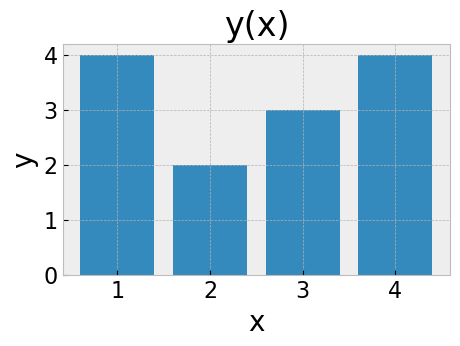

In [6]:
# 0) import potrzebnych bibliotek i klas - Przykład  
import matplotlib.pyplot as plt
plt.style.use(['my_plot_style.mplstyle'])

# obiekt wykresu
fig = plt.figure(figsize = (5, 3))
ax  = fig.add_subplot(111)

ax.bar([1, 2, 3, 4], [4, 2, 3, 4])
ax.set_title('y(x)')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()


##  4C. Definicja stylu za pomocą rcParams <a name="style3"></a>

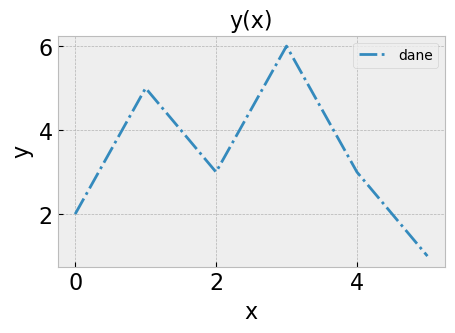

In [4]:
# 0) import potrzebnych bibliotek i klas - Przykład  
import matplotlib.pyplot as plt
plt.style.use('bmh') 
import matplotlib as mpl
#definicja stylu
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '-.'
mpl.rcParams['lines.color'] = 'red'
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linewidth'] = .5
mpl.rcParams['grid.alpha'] = 1
mpl.rcParams['legend.fontsize'] = 10 # można definiowac różne rozmiary czcionki dla parametrów
mpl.rcParams["legend.loc"]  = 'upper right' # lokalizacja legendy

# obiekt wykresu
fig = plt.figure(figsize = (5, 3))
ax  = fig.add_subplot(111)

ax.set_title('y(x)')
ax.plot([2,5,3,6,3,1], label = 'dane')
ax.legend() # wstawienie legendy (dane z argumentu 'label')

ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

##  5. Histogram <a name="histogram"></a>

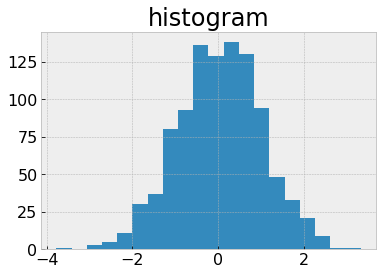

In [11]:
import numpy as np

# generowanie danych
x = np.random.randn(1000)

# definicja obiektu
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("histogram")
ax.hist(x, 20)
ax1.yaxis.grid(True, which='major')             # generowanie gridu na osi y
ax1.xaxis.grid(True, which='major')             # generowanie gridu na osi x
plt.show()
fig.savefig('histogram.png',format='png', pad_inches=0.01, dpi=72)

##  6. Scatter <a name="scatter"></a>

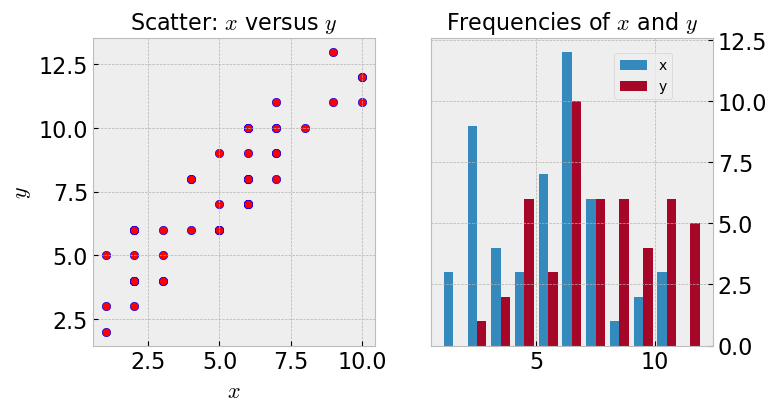

In [70]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.randint(low=1, high=11, size=50)
y = x + np.random.randint(1, 5, size=x.size)
data = np.column_stack((x, y))


# utworzenie fugury i dwóch wykresów
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,   figsize=(8, 4))

ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
ax1.set_title('Scatter: $x$ versus $y$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')

ax2.hist(data, bins=np.arange(data.min(), data.max()),label=('x', 'y'))
ax2.legend(loc=(0.65, 0.8))
ax2.set_title('Frequencies of $x$ and $y$')
ax2.yaxis.tick_right()
plt.show() # wyświetlenie

##  7. Wykres pudełkowy - boxplot <a name="boxplot"></a>

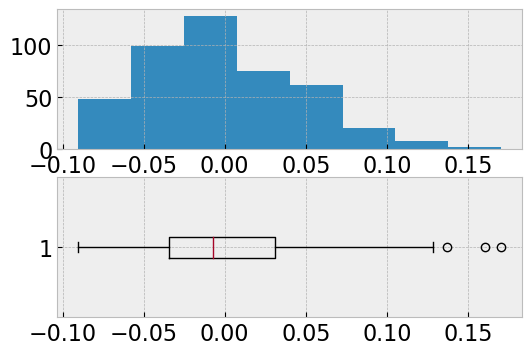

In [8]:
from matplotlib import pyplot as plt
import sklearn.datasets as sk
diabetes = sk.load_diabetes(); 
data = diabetes['data']; ip = 2;

fig = plt.figure(figsize=(6,4)) #obiekt klasy Figure

ax1 = fig.add_subplot(2,1,1) # utorzenie obiektu klasy Axes
plt.hist(data[:,ip], bins=8) # numer bins oznacza ilość słupków

ax2 = fig.add_subplot(2,1,2) # utorzenie obiektu klasy Axes
plt.boxplot(data[:,ip],vert=0)
plt.show()

##  8. Zapisywanie wykresów interaktywnych <a name="interaktywne"></a> 

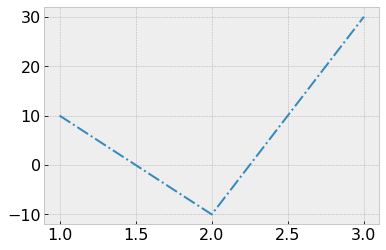

In [75]:
import matplotlib.pyplot as plt
import pickle
fig, ax = plt.subplots()
ax.plot([1,2,3],[10,-10,30])

#Zapisywanie interaktywnego obiektu jako obiekt formatu binarnego:
pickle.dump(fig, open('FigureObject.pickle', 'wb')) # dla Python 3 - Python 2 'file' zamiast 'open'


<ipython-input-76-24b6c7c6a865>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figx.show() # Show the figure, edit it, etc.!


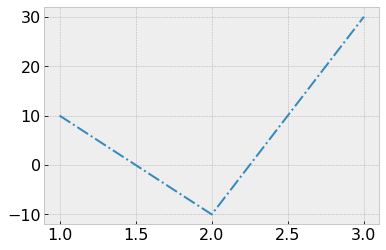

In [76]:
# Otwarcie interaktywnego wykresu  (nie można otwierać w Jupyter Notebook, plik nalezy otwierać w Pythonie)
figx = pickle.load(open('FigureObject.pickle', 'rb'))
figx.show() # Show the figure, edit it, etc.!

# Z wykresów interaktywnych można również wyodrębnić dane :
data = figx.axes[0].lines[0].get_data()

##  6. Mapa - shapefile <a name="shapefile"></a>
Pliki shape, z granicami administracyjnymi kraju można pobrać na stronie: https://gadm.org/download_country_v3.html

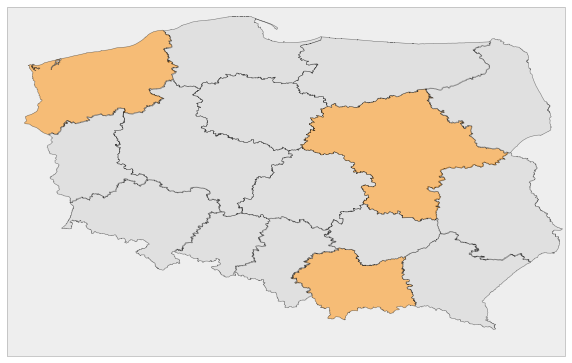

In [10]:
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt

# wczytanie pliku shape, 
# pliki shape można pobrać na stronie: https://gadm.org/download_country_v3.html
fname = "maps_gadm36_POL_shp/gadm36_POL_0.shp" # granice kraju
fname = "maps_gadm36_POL_shp/gadm36_POL_1.shp" # granice kraju + województwa
#fname = "maps_gadm36_POL_shp/gadm36_POL_2.shp" # granice kraju + województwa + powiaty
#fname = "maps_gadm36_POL_shp/gadm36_POL_3.shp" # granice kraju + województwa + powiaty  + gminy

plt.figure(figsize=(10, 8))  # inicjalizacja wykresu
ax = plt.axes(projection=ccrs.Mercator())

east    = 13.8
west    = 24.2
north   = 55
south   = 48.5
ax.set_extent([west, east, south, north], ccrs.Mercator())

adm1_shapes = list(shpreader.Reader(fname).geometries())
shp = shpreader.Reader(fname)

woj = ('Zachodniopomorskie', 'Mazowieckie', 'Małopolskie') # lista województw do pokolorowania
for record, state in zip(shp.records(), shp.geometries()):
    name = record.attributes['NAME_1'] # nazwy województw
    if name in woj:
        facecolor = 'DarkOrange'
    else:
        facecolor = 'LightGray'
    # rysowanie 
    ax.add_geometries([state], 
                      ccrs.Mercator(), 
                      facecolor=facecolor, 
                      edgecolor='black',
                      alpha=0.5)
plt.show()